Import libraries

In [ ]:
import numpy as np # mathematical operations and array manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import plotly.express as px # interactive visualisation
import plotly.graph_objects as go
import missingno as msno  # visualise missingness

By default, Pandas truncates the display of columns if there are too many, and it only shows a subset in the output.

When you set display.max_columns to None, it means there is no maximum limit on the number of columns to be displayed. As a result, when you print or display a DataFrame, you will see all columns, regardless of the total number.


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Read the datafiles


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/test.csv")

Run basic describe() and info() always to understand the data better.

Count - Total values in the dataset
mean- average
std -  measure of how dispersed values are from mean.

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Notice the not null count and data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#df.shape indicates number of rows and columns. Returns a tuple
df_train.shape

(1460, 81)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df_train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
df = [df_train,df_test]
df_combined = pd.concat(df).reset_index(drop=True)

In [ ]:
df_combined.shape

(2919, 81)

In [ ]:
#check for duplicates
df_combined .duplicated().sum()

0

In [ ]:
#See if data has any nulls and if yes, how many?
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

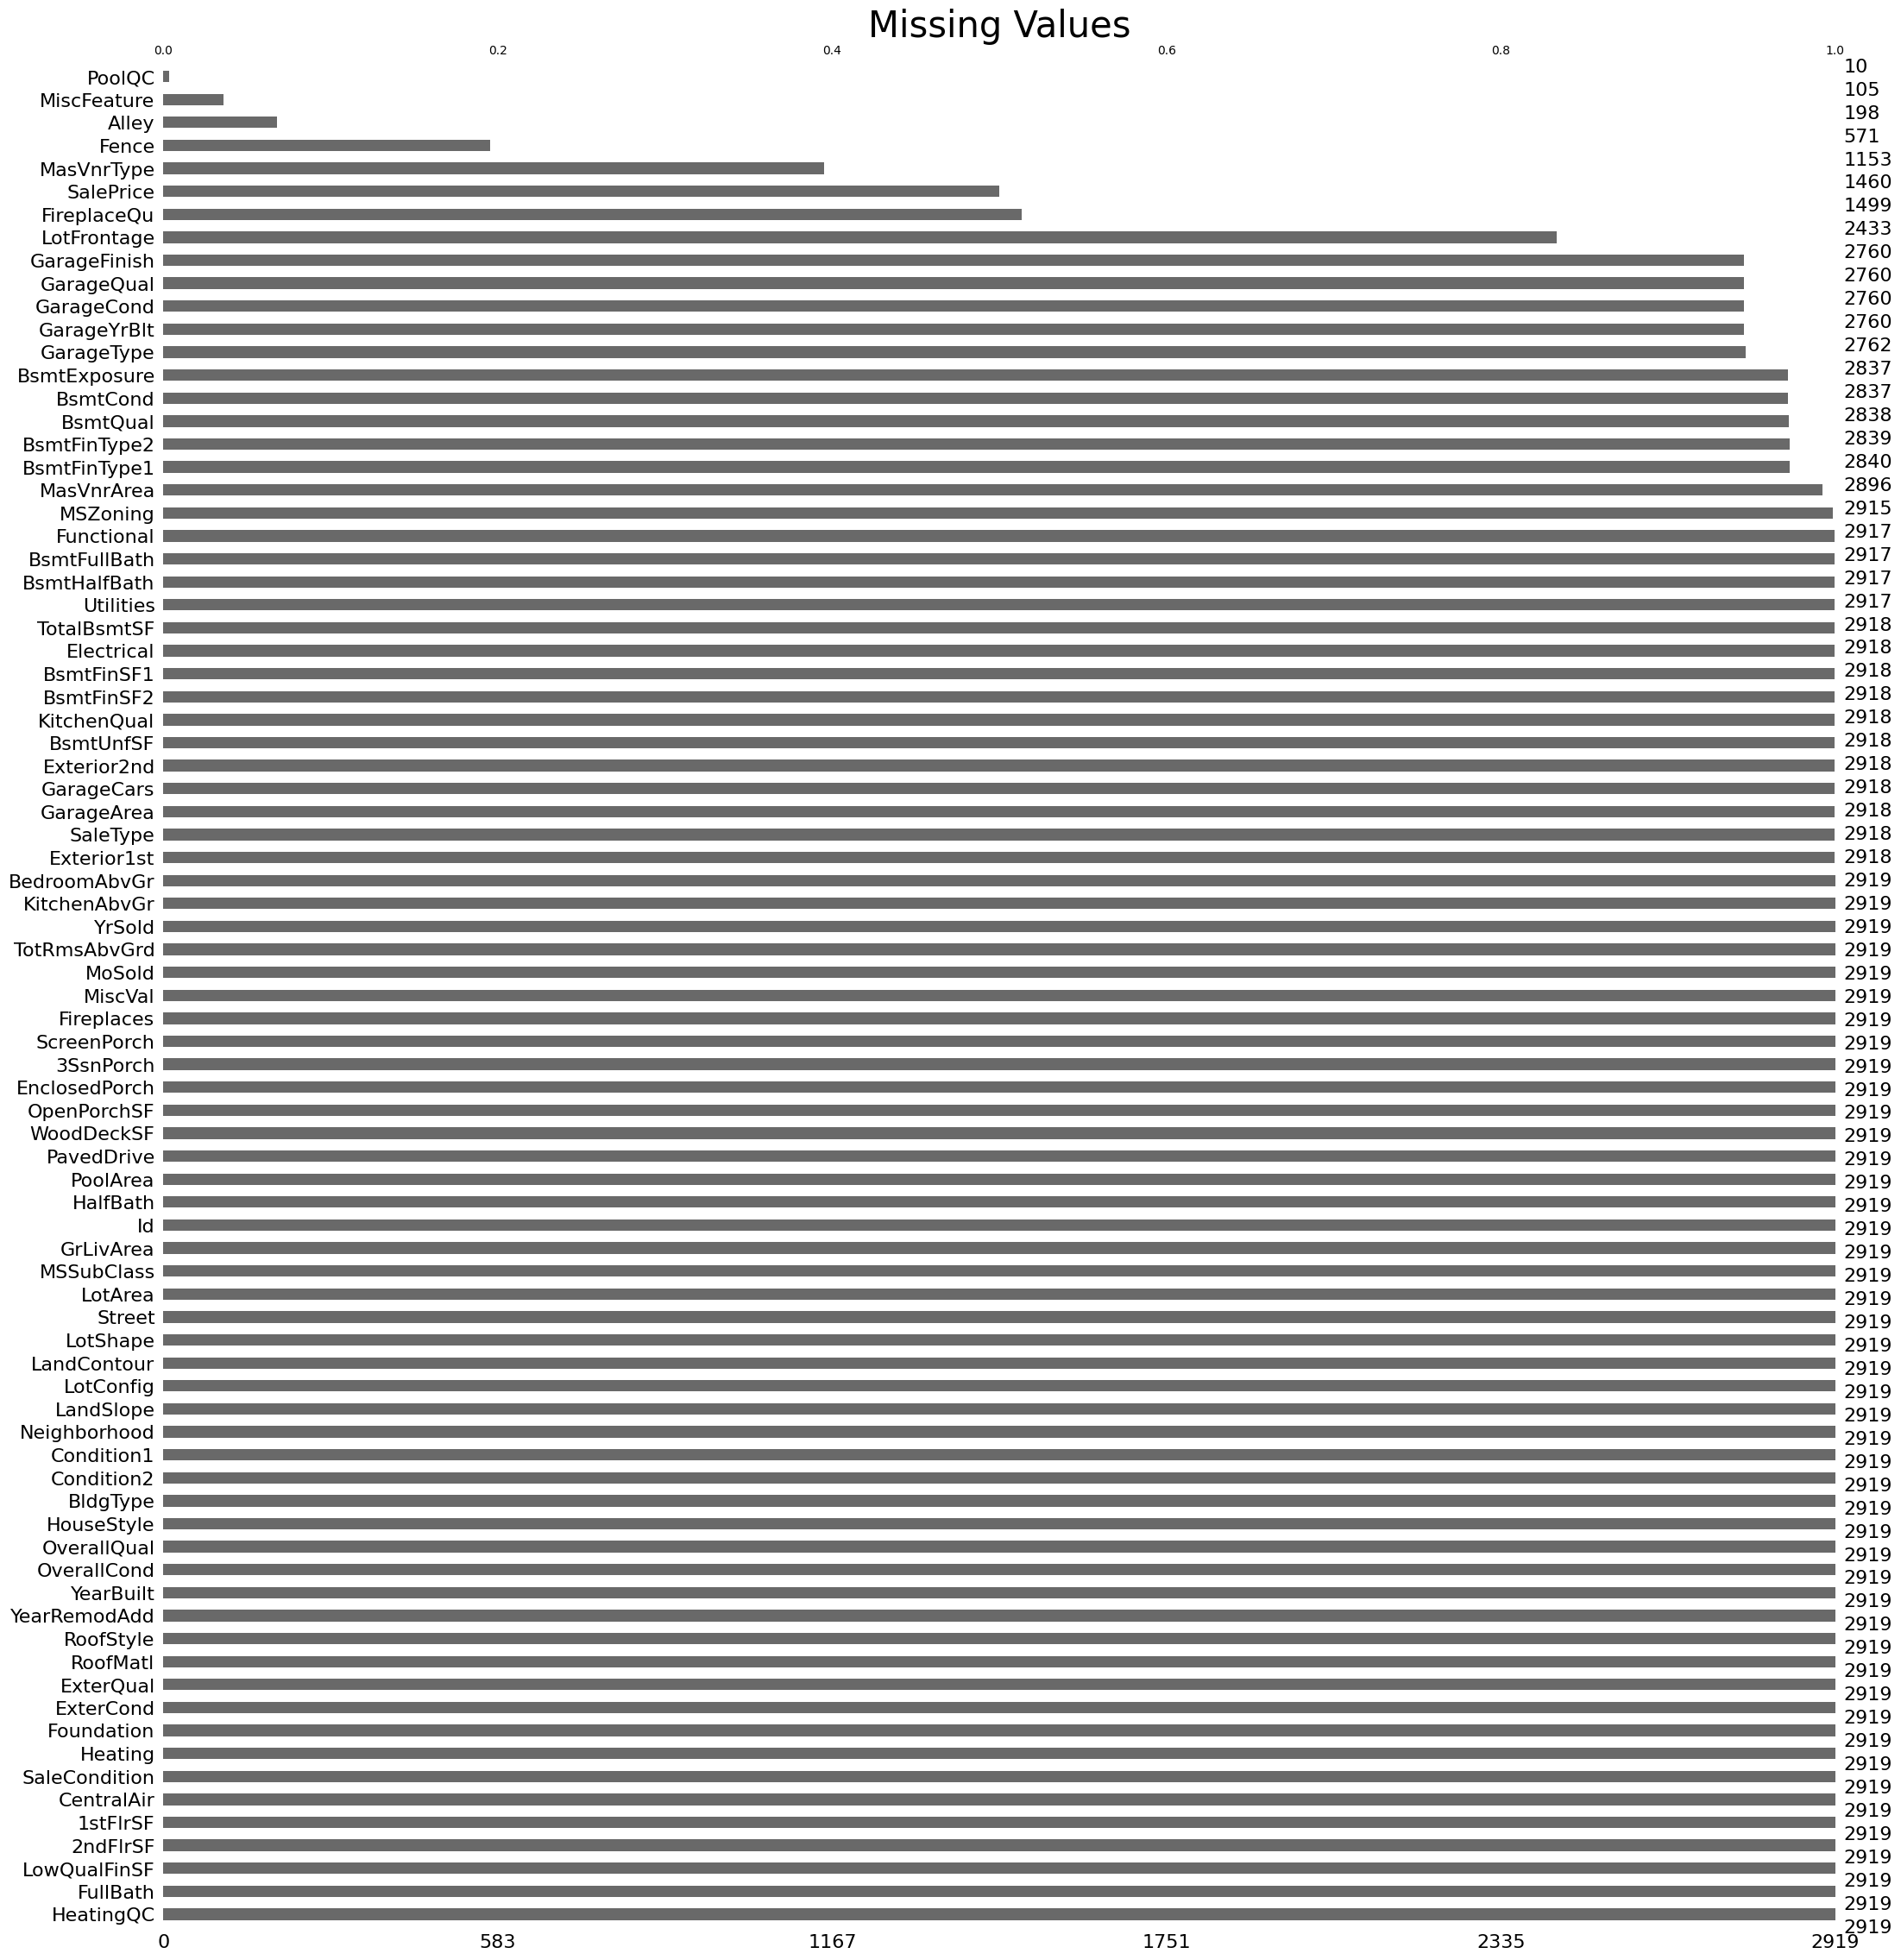

In [ ]:
# Import missingno package
import missingno as msno

# Which columns have missing values?
msno.bar(df_combined, sort='descending')
plt.title('Missing Values',fontsize=30)
plt.show()



 Discover reasons behind missing dataset.


1. Find any patterns- we can draw the dataset

<Axes: >

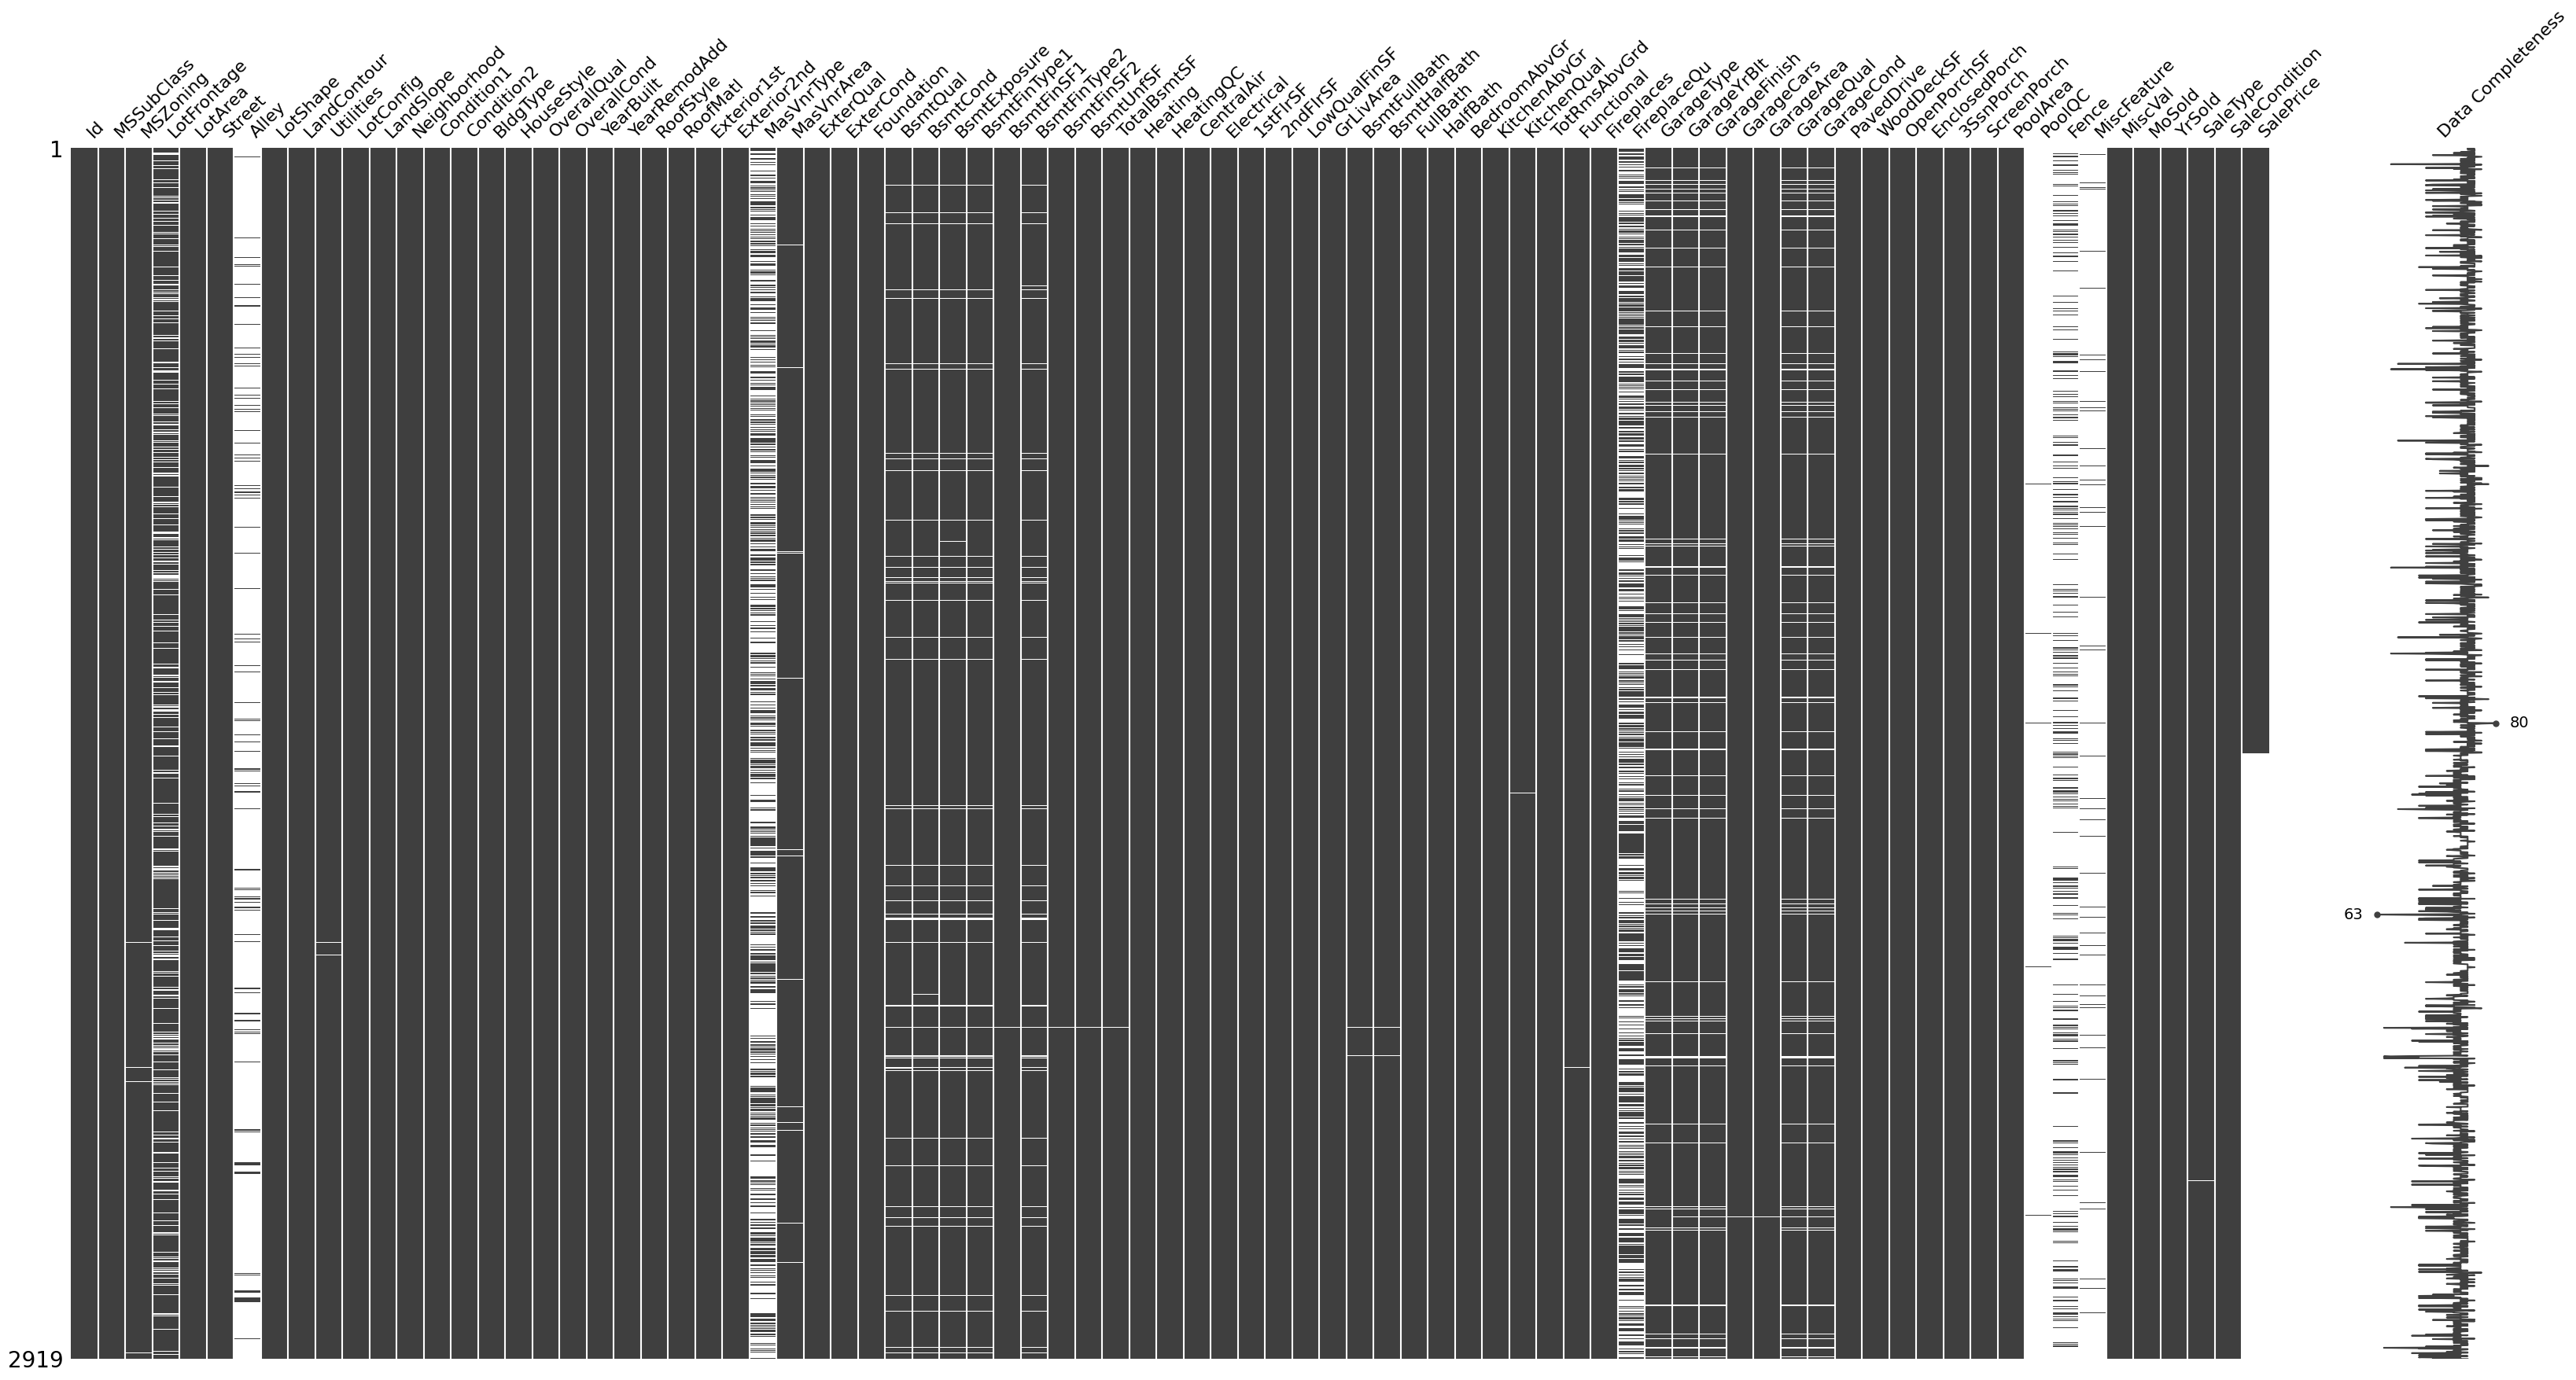

In [ ]:
# Let's visualise the pattern of nulls in our dataset
msno.matrix(df_combined, labels=True, figsize=(40,20))

2. See correlation between missing values (using heatmap)
Heat map shows correlation. If its 1 its highly correlated. If its 0, its not. If its -1 its negatively correlated.

In this case, missing values correlation meant to check if presence of one value affects the presence of other (mostly like true/false) NOT real values


<Axes: >

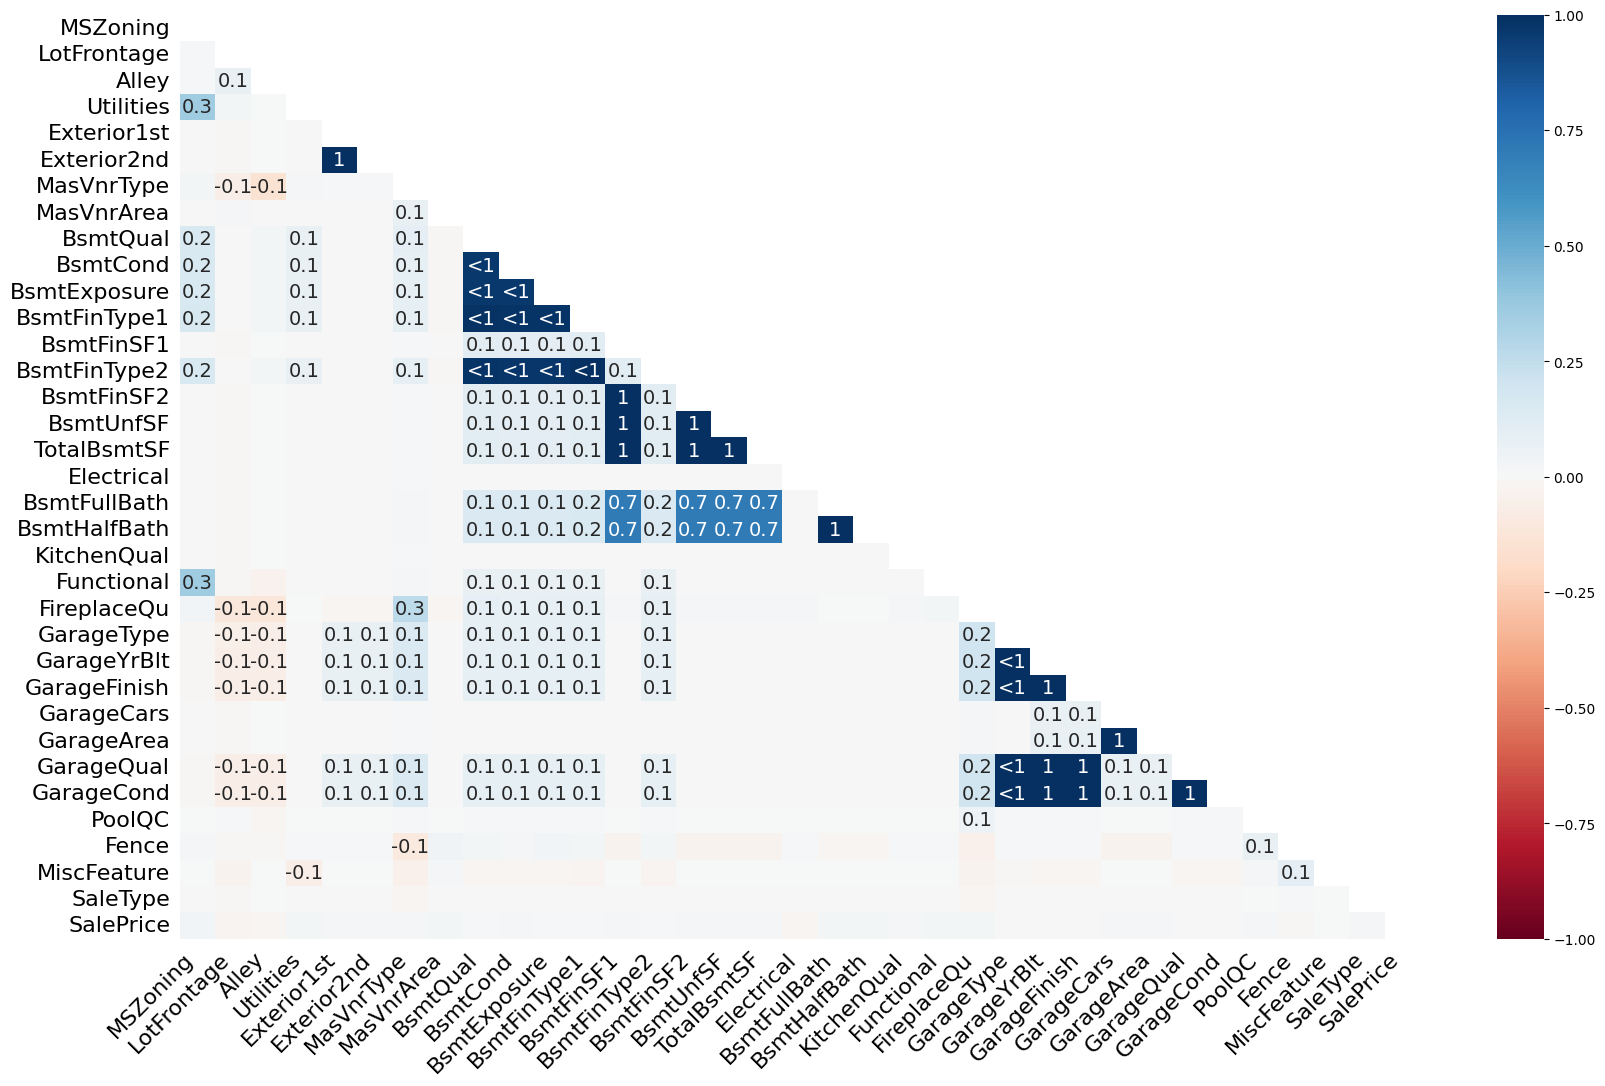

In [ ]:
#can draw heatmap using seaborn or  the python lib called missingno
# Let's visualise the correlation between the missingness in different columns
msno.heatmap(df_combined)

#in seaborn
# plt.figure(figsize=(16, 6))
# # define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
# heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

3. The heatmap result should show obvious correlation if it exists. In this case, f a house has no garage, then there’s no value for GarageQual, GarageCond, etc. Same with ‘Bsmt’ and ‘MasVnr’ columns.

This shows that they arent missing at random

4. In the case where heatmaps do not provide obvious correlations, we use CONTINGENCY TABLES or crosstab func in python

They create a matrix with a sum of values as

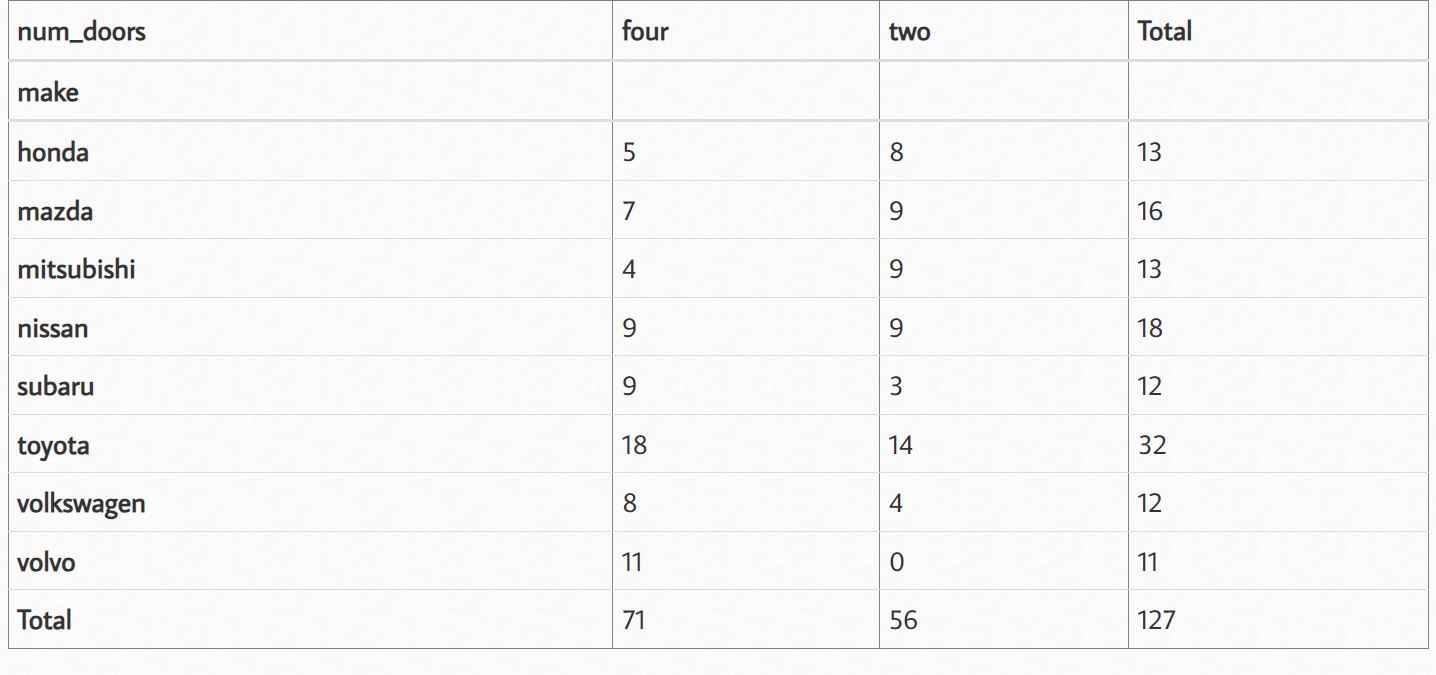

In [ ]:
missing_data_df = df_combined.isnull()

In [ ]:
#Comparing the empty PoolQC with original data PoolArea
pd.crosstab(missing_data_df['PoolQC'], df_combined['PoolArea'])

PoolArea,0,144,228,368,444,480,512,519,555,561,576,648,738,800
PoolQC,,,,,,,,,,,,,,
False,0,1,1,0,0,1,1,1,1,0,1,1,1,1
True,2906,0,0,1,1,0,0,0,0,1,0,0,0,0


In [ ]:
pd.crosstab(missing_data_df['MiscFeature'], df_combined['MiscVal'])

MiscVal,0,54,80,300,350,400,420,450,455,460,480,490,500,560,600,620,650,700,750,800,900,1000,1150,1200,1300,1400,1500,1512,2000,2500,3000,3500,4500,6500,8300,12500,15500,17000
MiscFeature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,3,1,1,1,1,18,1,9,1,1,2,1,13,1,8,1,3,7,1,1,1,1,1,3,1,1,3,1,7,2,2,1,2,1,1,1,1,0
True,2813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Examine the two observations where MiscVal is 0 but MiscFeature is not null
two_obsv = df_train[(df_train["MiscVal"] == 0) & (df_train['MiscFeature'].notnull())]
two_obsv[['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal
873,Othr,0
1200,Shed,0


Since above is just two values, we can drop

In [ ]:
pd.crosstab(missing_data_df['FireplaceQu'], df_combined['Fireplaces'])

Fireplaces,0,1,2,3,4
FireplaceQu,,,,,
False,0,1268,219,11,1
True,1420,0,0,0,0


In [ ]:
pd.crosstab(missing_data_df['Electrical'], df_combined['Utilities'])

Utilities,AllPub,NoSeWa
Electrical,,
False,2915,1
True,1,0


In [ ]:
bsmt_vals = ['TotalBsmtSF','BsmtExposure','BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
garage_vals = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
loft_fron_vals = ['']

In [ ]:
selected_columns_df = missing_data_df[bsmt_vals]
# Calculate the correlation matrix
correlation_matrix = selected_columns_df.corr()

# Display the correlation matrix
print(correlation_matrix)

              TotalBsmtSF  BsmtExposure  BsmtFinType2  BsmtFinType1  BsmtCond  \
TotalBsmtSF      1.000000      0.108888      0.110280      0.110995  0.108888   
BsmtExposure     0.108888      1.000000      0.974683      0.981018  0.962357   
BsmtFinType2     0.110280      0.974683      1.000000      0.993555  0.974683   
BsmtFinType1     0.110995      0.981018      0.993555      1.000000  0.981018   
BsmtCond         0.108888      0.962357      0.974683      0.981018  1.000000   
BsmtQual         0.109577      0.968463      0.980858      0.987229  0.968463   

              BsmtQual  
TotalBsmtSF   0.109577  
BsmtExposure  0.968463  
BsmtFinType2  0.980858  
BsmtFinType1  0.987229  
BsmtCond      0.968463  
BsmtQual      1.000000  


Imputation and Fill in missing values.

In [ ]:
print(df_combined.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

All missing values should be dealt with at this stage

In [ ]:
#Drop ID
#df_combined = df_combined.drop(columns='Id', axis=1)
#Drop outliers like the two rows based on condition
# Specify conditions for dropping rows
condition_misc = (df_combined["MiscVal"] == 0) & (df_combined['MiscFeature'].notnull()) # Rows where MiscVal == 0 but MiscFeature is not null
condition_masvnr = (df_combined['MasVnrType'] == 'None') & (df_combined['MasVnrArea'] != 0) # Rows where MasVnrType is None but MasVnrArea isn't 0
condition_electrical = (df_combined['Electrical'].isnull()) & (df_combined['Utilities'] == 'AllPub') # Rows where Electrical system is NaN but Utilities is AllPub

conditions = condition_misc | condition_masvnr | condition_electrical

df_filtered = df_combined[~conditions]

In [ ]:
columns_to_fill_with_zero = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
    'MasVnrType', 'MasVnrArea'
]

df_combined[columns_to_fill_with_zero] = df_combined[columns_to_fill_with_zero].fillna(0)

Check that all missing values have been taken care of.

In [ ]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Above shows that LOT FRONTAGE needs to be taken care of

In [ ]:
# Impute LotFrontage using:
# miceforest's ImputationKernel
# mean
# median
# Compare performance

#I will just use mean for now
df_combined['LotFrontage'] = df_combined['LotFrontage'].mean()

In [ ]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#Feature Transformation
Feature transformation refers to the process of changing the representation or structure of input features in a dataset. The goal is to derive new features or modify existing ones to enhance the performance of a machine learning model or to meet specific assumptions and requirements.

1. Normalisation or scaling
2. Handling skewed Distributions
3. Encoding Categorical Variables
4. Imputation

These all come under feature transformation

#Step 6 Exploratory Data Analysis
To gain more insights on the data. Just to understand it.
Includes:
1. Correlation Analysis (example peasron correlation) -not always necessary
2. See counts of categorical features (IMP for encoding)
3. Visualise the distributions of numerical features (IMP to see skewness of data. If data is too skewed it will need to be handled and transformed)
4. Find out which categorical features are closely related with the target variable that needs to be predicted.
5. Find out which numerical features are closely related to target (in this case SalePrice)

Encoding is ONLY done on CATEGORICAL features.


Lets say we visualise the distribution of numercial features and find out that few values are too skewed.

IF The ALGO that i am using is non-parametric (A non-parametric model is a type of statistical or machine learning model that does not make explicit assumptions about the functional form or shape of the underlying data distribution.) then I DONOT have to worry about transforming the skewed data.

If it is an Algo that is affected then I will have to go either
1. Log transformation,
2. Inverse Transformation
3. Yeo-Johnson Transformation

In [ ]:
#See how to draw skewness of data. See if you can do it without yeo johnson

#Step 7: Encoding Categorical Data

Machine learning models are designed to work with numerical data (unless they are Natural Language Processing, Speech Recognition, or Image Recognition models).

So I need to convert categorical data in the dataset into numerical data (i.e. encode it numerically).

Which encoding we choose depends on if the categories in the feature are Nominal or Ordinal

1. Nominal (categories without a natural order)
  
  -One-hot encoding
  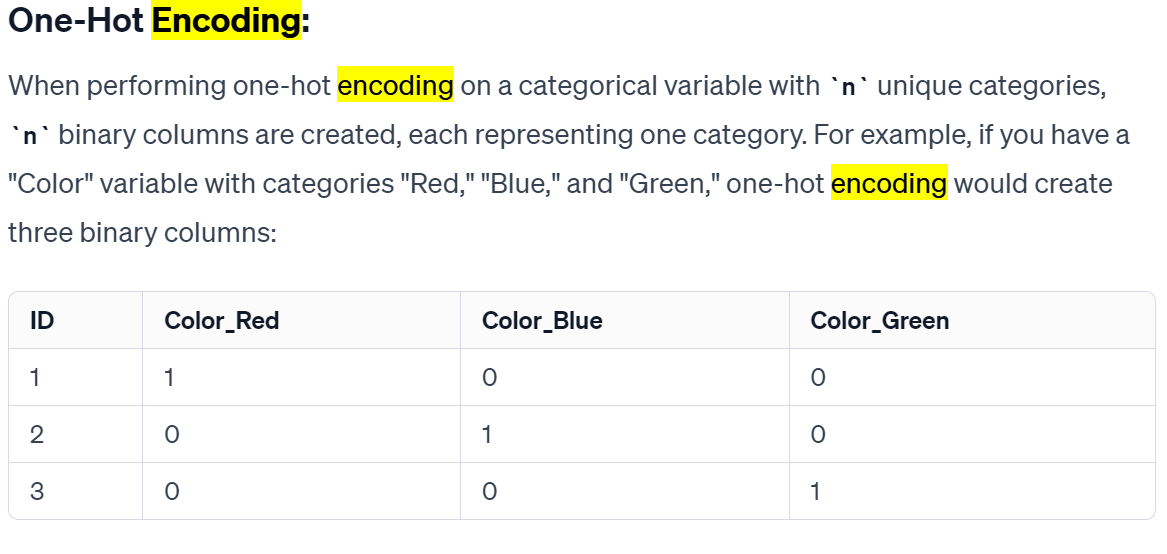

2. Ordinal Data (with order like Small, Medium large)
  
  -Label Encoding
  assigns a unique integer value to each unique category in a feature. This seems to achieve what one-hot encoding does without creating new columns. BUT it also might fool a model into thinking there’s an order between the categories?
  
  -Ordinal Encoding
assigns, to each unique category in a feature, a unique integer value that represents its natural order. For example, PoolQC has the following categories (No Pool, Fair, Typical, Good, Excellent). I could encode them ordinally as (0, 1, 2, 3, 4).

Read about Multicollinearity in the attached doc



In [ ]:
# Import packages for encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
#dataframe of all categorical features
cat_features = [*df_combined.select_dtypes(include='object').columns]

In [ ]:
#List all categorical features and create two lists/ One to be passed to one hot encoding and other to be passed to ordinal
cat_features_ohe =  ['MSZoning', 'Street', 'LotConfig','LandContour', 'LandSlope','Neighborhood','Condition1','Condition2','BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'MiscFeature', 'Foundation', 'Heating',
                    'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

In [ ]:
#all features not one hot encoded will be ordinal encoded
cat_features_oe = [x for x in set(cat_features).difference(set(cat_features_ohe))]

To avoid multicollinearity, it's common practice to drop one of the one-hot encoded columns for each categorical variable. This is known as the "dummy variable trap." By dropping one column, you eliminate the perfect correlation between the columns, and the model can accurately estimate the coefficients for each category.

In most cases, dropping one column doesn't result in a loss of information because the omitted category is implicitly represented by the other columns. For example, if "Color_Red" and "Color_Blue" are both 0, it implies that the color is "Green."

In [ ]:
#To encode one hot encoding
#the "Drop_first= True" is to avoid multicollinearity. It drops one column
df_combined= pd.get_dummies(df_combined, columns=cat_features_ohe, drop_first=True)
#ordinal encoding. . If your ordinal features contain a mix of integer and string values, you need to ensure that they are of the same data type before applying the encoder.
ordinal_encoder = OrdinalEncoder()
df_combined[cat_features_oe] = df_combined[cat_features_oe].astype(str)
df_combined[cat_features_oe] = ordinal_encoder.fit_transform(df_combined[cat_features_oe])

Calculate VIF to check for Multicollinearity - OPTIONAL

A VIF of 1 indicates no multicollinearity, while higher values suggest increasing levels of multicollinearity. A common threshold is a VIF of 10, above which multicollinearity is considered problematic.

In [ ]:


# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# # Assuming 'X' is your feature matrix (excluding the target variable)
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif_data)




Since onehot encoding adds an extra column for each category, to avoid redundency, after applying one hot encoding, the redundant columns are always dropped.


How to figure out which redundant columns to drop??
1. Dropp the least frequent category of the feature. (NOT NECESSARY)
2. Drop columns below a threshold like

Example: Drop columns with less than 1% occurrences

threshold = 0.01

df_encoded = df_encoded[df_encoded.columns[df_encoded.mean() > threshold]]

3. Easy way is just to Drop one category from each variable

4. Or if its a tree based algo, you can keep all columsn too as it doesnt affect

After onehot encoding, the number of columns will obv inc


Pearson correlation can be used for feature selection by identifying relationships between individual features and the target variable in a regression or classification problem. The correlation coefficient (
r) quantifies the strength and direction of a linear relationship between two continuous variables.

In [ ]:
#check dataset shape
df_combined.shape

(2919, 204)

#Step 8. Training/Model Selection

Shortlist algos and import them.
Import performance matrix like MAE or RMSE

Split the dataset

Lowest RMSE the better

#SCALING data before inputting to algo is imp in most cases

In [ ]:
#import algo and performance matrix
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# Separate train and test datasets
train = df_combined.iloc[:1460,:]
test = df_combined.iloc[1460:, :]

print(f'train shape is{train.shape}')
print(f'test shape is{test.shape}')

train shape is(1460, 204)
test shape is(1459, 204)


In [ ]:
# Define the train dataset
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
print(X.shape)

(1460, 203)


In [ ]:
# Define the test dataset
test = test.drop('SalePrice', axis=1)

In [ ]:
print(test.shape)

(1459, 203)


In [ ]:
#Scaling "training data"
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Initialize RobustScaler for feature scaling
scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler (optional for consistency)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(X_train_scaled, y_train)
y_pred_rf = model_RF.predict(X_test_scaled)
# Evaluate the performance of the Random Forest model on the testing data
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest - Root Mean Squared Error (RMSE) on Testing Data: {rmse_rf}')
print(f'MAE IS {mean_absolute_error(y_test, y_pred_rf)}')


from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train_scaled, y_train)
Y_pred = model_GBR.predict(X_test_scaled)
rmse_gbr = np.sqrt(mean_squared_error(y_test, Y_pred))
print(f'Gradient Boosting Regressor - Root Mean Squared Error (RMSE) on Testing Data: {rmse_gbr}')
print(f'MAE IS {mean_absolute_error(y_test, Y_pred)}')


from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors=5)
model_KNN.fit(X_train_scaled, y_train)
y_pred_knn = model_KNN.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'K-Nearest Neighbors (KNN) - Root Mean Squared Error (RMSE) on Testing Data: {rmse_knn}')
print(f'MAE IS {mean_absolute_error(y_test, y_pred_knn)}')


import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train_scaled,y_train)
Y_pred = model_XGBR.predict(X_test_scaled)
rmse_train = np.sqrt(mean_squared_error(y_test, Y_pred))
print(f'XGB - Root Mean Squared Error (RMSE) on Training Data: {rmse_train}')
print(f'MAE IS {mean_absolute_error(y_test, Y_pred)}')
print(f'MAPE IS {mean_absolute_percentage_error(y_test, Y_pred)}')
print(f'MANUAL MAPE {np.mean(np.abs((y_test - Y_pred) / y_test)) * 100}')


Random Forest - Root Mean Squared Error (RMSE) on Testing Data: 25322.722944955756
MAE IS 16170.913671232878
Gradient Boosting Regressor - Root Mean Squared Error (RMSE) on Testing Data: 23030.040902527508
MAE IS 15111.619533354544
K-Nearest Neighbors (KNN) - Root Mean Squared Error (RMSE) on Testing Data: 51702.094540605394
MAE IS 30797.786849315067
XGB - Root Mean Squared Error (RMSE) on Training Data: 25608.100795500304
MAE IS 15683.452226027397
MAPE IS 0.09393551909187645
MANUAL MAPE 9.393551909187645


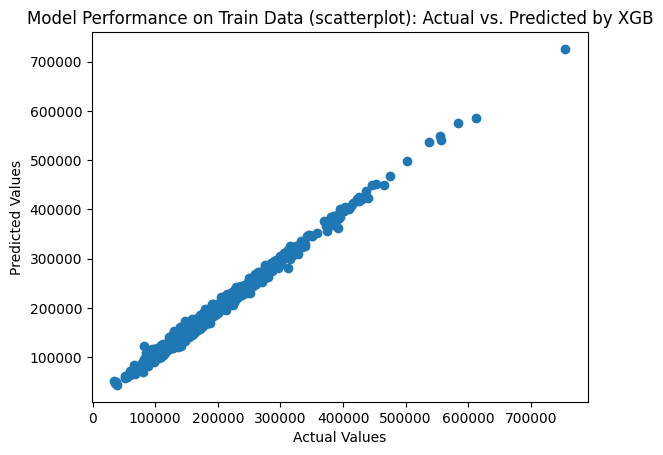

In [ ]:
#Visualise actual vs pred on best model XGB
plt.scatter(y_train, model_XGBR.predict(X_train_scaled),label = "XGB" )
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance on Train Data (scatterplot): Actual vs. Predicted by XGB')
plt.show()